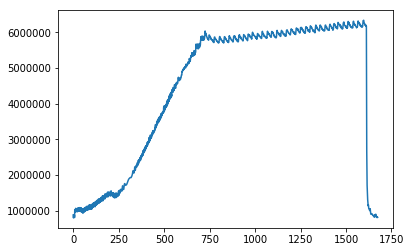

In [2]:
# 读取数据文件，保存成np.array
import matplotlib.pyplot as plt
import numpy as np

data = []

# 234.txt 采样时间间隔40ms
# 123.txt 采样时间间隔500ms
with open("234.txt") as file:
    lines = file.readlines()
    for line in lines:
        line  = line.strip()
        data.append(int(line))

np_data = np.array(data)
plt.clf()
# 显示采集的所有数据
plt.plot(np.array(range(len(np_data))), np_data)
plt.show()

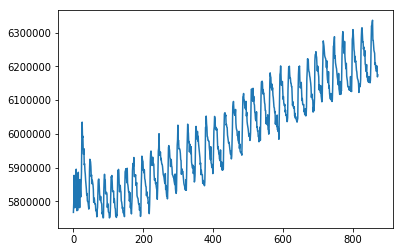

In [56]:
# 快速充气阶段的数据丢弃掉，只使用>5750000的数据进行考察
y_train = np_data[np_data > 5750000]
X_train = np.array(range(len(y_train))).reshape(-1, 1)
plt.plot(y_train)
plt.show()

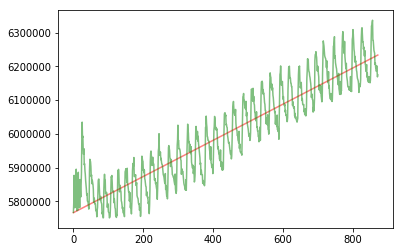

In [4]:
# 使用线性回归对数据进行直线拟合
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
pred = lin_reg.predict(X_train)
plt.plot(X_train[:,0], pred, c='r', alpha = 0.5)
plt.plot(X_train[:,0], y_train, c='g', alpha = 0.5)
# plt.plot(X_train[:,0], y_train - pred, c='orange', alpha = 1)
plt.show()

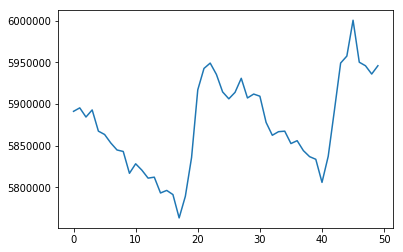

In [5]:
# 取出来50个数据，看有多少个波形
dd = y_train[200:250]
plt.plot(dd)
plt.show()

上图观察的是50*40ms = 2s内的数据，可以粗略估计脉冲周期在22左右，也就是22*40 = 880ms = 0.9s 和脉搏频率是一致的

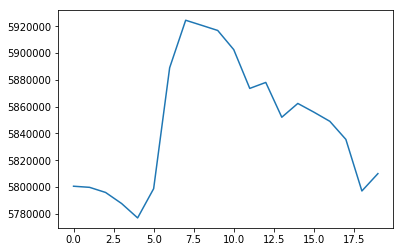

In [6]:
# 取出来20个数据，看有多少个波形
dd = y_train[40:60]
plt.plot(dd)
plt.show()

理论上讲 20*500 = 10s, 因此大概应该有10/0.88 = 11.36个周期的脉冲， 和预想的差别不大

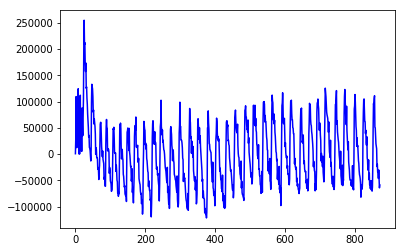

In [10]:
maibo = y_train - pred
plt.plot(maibo, c='b', alpha = 1)
plt.show()

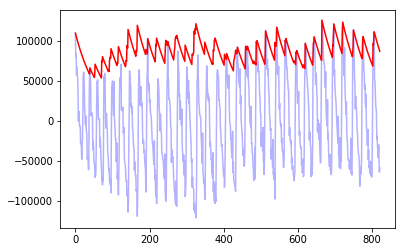

In [43]:

def env_full(input_y):
    output_y = []
    old = 0.0
    rct = 60.0
    for i in input_y:
        abs_in = abs(i)
        if abs_in > old:
            old = abs_in
        else:
            old = output_y[-1] * rct / (rct + 1)
        output_y.append(old)
    return output_y

oo = env_full(maibo[50:])
plt.plot(maibo[50:], c='b', alpha = 0.3)
plt.plot(oo, c='r', alpha = 1)
plt.show()

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


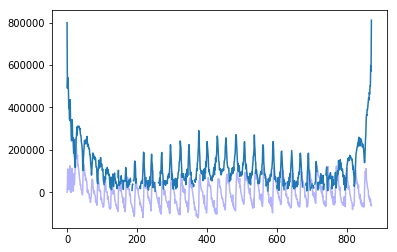

In [58]:
import pylab as pl
import scipy.signal as signal
from scipy import fftpack
x = np.array(y_train)
hx = fftpack.hilbert(x)
plt.plot(maibo, c='b', alpha = 0.3)
plt.plot(np.sqrt(x**2 + hx**2))
plt.show()

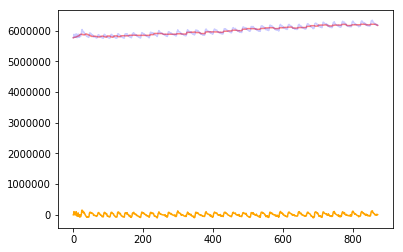

In [8]:
import scipy.signal as signal
x_med = signal.medfilt(y_train, 25)
plt.plot(X_train[:,0], x_med, c='r', alpha = 0.5)
plt.plot(X_train[:,0], y_train, c='b', alpha = 0.2)
plt.plot(X_train[:,0], y_train - x_med, c='orange', alpha = 1)
plt.show()